<a href="https://colab.research.google.com/github/srijita1406/Machine-Learning-Projects/blob/main/Credit_Card_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn.metrics import classification_report
from google.colab import files

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Downloading the Credit Card Dataset:**
1) app_df has the application data
2) cr_df has the credit status

In [ ]:
app_df = pd.read_csv('https://drive.google.com/uc?id=1gjfTNwapOwg80NlUUkaW4bM9ffqLdtLk')
cr_df = pd.read_csv('https://drive.google.com/uc?id=1tF78o9Qcfc9IScQF1uxMAc3bS9c7SLbN')

In [ ]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
cr_df.shape

(1048575, 3)

In [ ]:
cr_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


Preparing the Target Variable:

1. For customers having due for multiple months, the maximum number of months due is taken
2.   Any ID with greater than equal to 1 months due is marked as Class '1'



In [ ]:
cr_df['MONTHS_BALANCE'].value_counts()

-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64

In [ ]:
cr_df = cr_df.sort_values(['ID','MONTHS_BALANCE'], ascending=False)
cr_df = cr_df.groupby('ID').agg(max).reset_index()

Status:
0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [ ]:
cr_df['STATUS'].value_counts()

X    25005
C    14882
0     5161
1      821
5       54
2       49
3       10
4        3
Name: STATUS, dtype: int64

In [ ]:
cr_df.shape

(45985, 3)

In [ ]:
cr_df['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
cr_df['STATUS'] = cr_df['STATUS'].astype('int')
cr_df['STATUS'] = cr_df['STATUS'].apply(lambda x:1 if x > 0 else 0)
cr_df['STATUS'].value_counts()

0    45048
1      937
Name: STATUS, dtype: int64

Merging both Application and Credit Status Datasets

In [ ]:
df = app_df.join(cr_df.set_index('ID'), on='ID', how='inner')
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 434812
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
STATUS                     0
dtype: int64

Getting the split of Binary Classes in our dataset

In [ ]:
df['STATUS'].value_counts()

0    35689
1      768
Name: STATUS, dtype: int64

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,0


Different Types of Features based on DataType

In [ ]:
binary_features = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_WORK_PHONE','FLAG_EMAIL']
continous_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS']
cat_features = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

Dropping Features:


1.   'OCCUPATION_TYPE' - Lot of Missing data (11323 data points)
2. 'FLAG_MOBIL' - All datapoints have the flag set to 1






In [ ]:
df.drop(['MONTHS_BALANCE','OCCUPATION_TYPE','FLAG_MOBIL'], axis=1, inplace=True)

Ordering Ordinal Values and Encoding:
We have determined the order of the income type (a qualitative call) and created the encoding of the variable 'NAME_INCOME_TYPE'

In [ ]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
encoder = OrdinalEncoder(categories=[['Student', 'Pensioner', 'Working','Commercial associate','State servant']])

df.NAME_INCOME_TYPE = encoder.fit_transform(df.NAME_INCOME_TYPE.values.reshape(-1, 1))

df['NAME_INCOME_TYPE'].unique()

array([2., 3., 1., 4., 0.])

Encoding Ordinal Columns without Ordering

In [ ]:
encoder2 = LabelEncoder()

# No specific order for other Categorical Variables
cat_features = ['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
for i in cat_features:
  df[i] = encoder2.fit_transform(df[i].values.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,2.0,1,0,4,-12005,-4542,1,0,0,2.0,0
1,5008805,M,Y,Y,0,427500.0,2.0,1,0,4,-12005,-4542,1,0,0,2.0,0
2,5008806,M,Y,Y,0,112500.0,2.0,4,1,1,-21474,-1134,0,0,0,2.0,0
3,5008808,F,N,Y,0,270000.0,3.0,4,3,1,-19110,-3051,0,1,1,1.0,0
4,5008809,F,N,Y,0,270000.0,3.0,4,3,1,-19110,-3051,0,1,1,1.0,0


For binary features we had used PANDAS DUMMIES for one hot encoding

In [ ]:
#Getting dummies using Pandas
df = pd.get_dummies(df, columns=binary_features, drop_first=True)

In [ ]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,CNT_FAM_MEMBERS,STATUS,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,FLAG_WORK_PHONE_1,FLAG_EMAIL_1
0,5008804,0,427500.0,2.0,1,0,4,-12005,-4542,0,2.0,0,1,1,1,1,0
1,5008805,0,427500.0,2.0,1,0,4,-12005,-4542,0,2.0,0,1,1,1,1,0
2,5008806,0,112500.0,2.0,4,1,1,-21474,-1134,0,2.0,0,1,1,1,0,0
3,5008808,0,270000.0,3.0,4,3,1,-19110,-3051,1,1.0,0,0,0,1,0,1
4,5008809,0,270000.0,3.0,4,3,1,-19110,-3051,1,1.0,0,0,0,1,0,1


Plotting different variables to get an understanding of outliers present

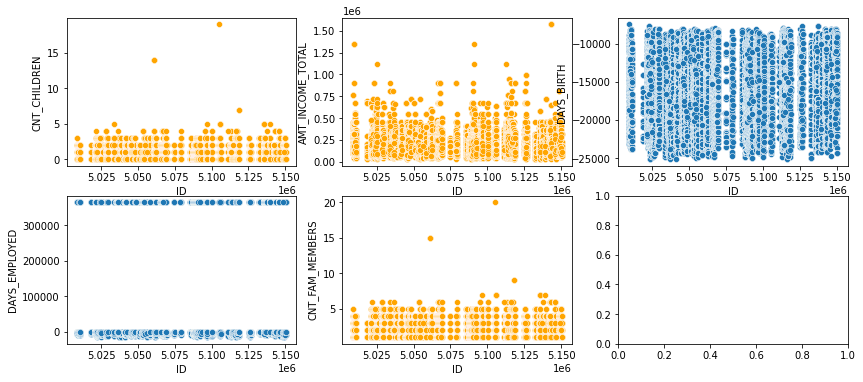

In [ ]:
# Plotting different Variables
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=df, ax=ax[1][0])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=df, ax=ax[1][1], color= 'orange')

In [ ]:
df.shape

(36457, 17)

Removing Outliers using IQR Technique

In [ ]:
q_hi = df['AMT_INCOME_TOTAL'].quantile(0.75)
q_low = df['AMT_INCOME_TOTAL'].quantile(0.25)
IQR = q_hi - q_low
lower_range = q_low - (1.5 * IQR)
upper_range = q_hi + (1.5 * IQR)
df= df[(df['AMT_INCOME_TOTAL']>lower_range) & (df['AMT_INCOME_TOTAL']<upper_range)]
df= df[(df['CNT_CHILDREN'] < 8)]
df= df[(df['CNT_FAM_MEMBERS'] < 8)]

df.shape

(34922, 17)

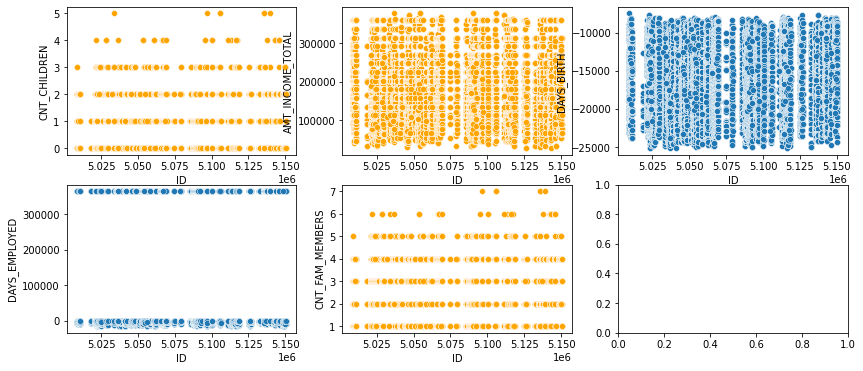

In [ ]:
# Plotting post removal of outliers
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=df, ax=ax[1][0])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=df, ax=ax[1][1], color= 'orange')

Train Test Split:

1.   Seperating Target Variable from the dataset
2.   Creating Train Test Split
3. Transforming the data
4. Using SMOTE to counter imbalance in the data



In [ ]:
new_cols = [col for col in df.columns if col != 'STATUS'] + ['STATUS']
df = df[new_cols]


X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)

sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(X_scaled, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train.value_counts()

0    27356
1      581
Name: STATUS, dtype: int64

In [ ]:
unique, counts = np.unique(y_train_res, return_counts=True)
print (np.asarray((unique, counts)).T)

[[    0 27356]
 [    1 27356]]


Defining the DecisionTreeClassifier Model

In [ ]:
classifier = DecisionTreeClassifier()
model = classifier.fit(X_train_res, y_train_res)
X_test_scaled = mms.transform(X_test)
prediction = model.predict(X_test_scaled)

Model Performance Metrics

In [ ]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, prediction)))
print(pd.DataFrame(confusion_matrix(y_test,prediction)))

Accuracy Score is 0.96478
      0    1
0  6707  135
1   111   32


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6842
           1       0.19      0.22      0.21       143

    accuracy                           0.96      6985
   macro avg       0.59      0.60      0.59      6985
weighted avg       0.97      0.96      0.97      6985



Feature Importance

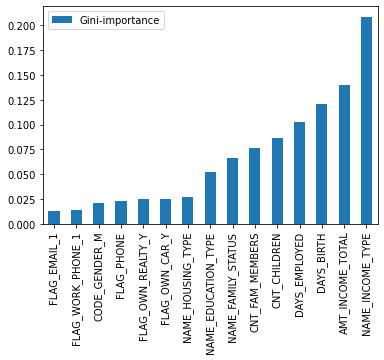

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
model.feature_importances_
importances = model.feature_importances_
indices = np.argsort(importances)

Download DecisionTree Image

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision_Tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.29169 to fit



True

In [ ]:
files.download('Decision_Tree.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>